# Python Cheat Sheet

## Manupulating with dataframe

#### <span style="color:DarkGreen">Read file and check info</span>

file_path = "C:/Users/yuuud/Desktop/UCD/Winter/452/data/Event_entry.csv" \
df = pd.read_csv(file_path)
print(df.info())

#### Read excel file:
df = pd.read_excel(file_path)

#### <span style="color:DarkGreen">Drop Column</span>
df.drop(df.columns[[0, 1, 9, 10]], axis=1, inplace=True)

#### <span style="color:DarkGreen">Drop Column or add column to another variable</span>
X = encoded_data.drop(columns=['Price']) \
y = encoded_data['Price']

#### <span style="color:DarkGreen">Split the data into training and testing data</span>
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Dealing with missing value

#### <span style="color:BlueViolet">1. Delete all missing value</span>
df.dropna(subset=['column'], inplace=True)

#### <span style="color:BlueViolet">2. Replace with mean value</span>
df['column'] = df['column'].fillna(df['column'].mean())

#### <span style="color:BlueViolet">3. Replace with 0</span>
df['column'] = df['column'].fillna(0)

#### <span style="color:BlueViolet">4. Check if my dataframe have NA value</span>
na_counts = df.isna().sum()

### 计算column的平均值，count， sum
column_avg = df['column'].mean() \
column_cnt = df['column'].count() \
column_sum = df['column'].sum()

如果数据是0，1可以直接通过.meam()计算1的%

## import matplotlib.pyplot as plt
## import seaborn as sns

### Bar Chart ###

In [ ]:
# 每个人的saving总和
# grouped_data = df.groupby('人')['saving'].sum().reset_index()

# 如果想要排序并limit数量
# top20_data = grouped_data.sort_values('saving', ascending=False).head(20)

# top20_data = top20_data.iloc[::-1]

# plt.figure(figsize=(7, 5)) 
# plt.barh(top20_data['人'], top20_data['saving'], color='teal')
# plt.title('Top 20 saving by individual')
# plt.xlabel('saving')
# plt.ylabel('individual')
# plt.xticks(rotation=90)    # 旋转标签 如果标签太长的话
# plt.tight_layout()
# plt.show()

##### 堆积柱状图

In [ ]:
# average_prices = df.groupby(['Regionname', 'Type'])['Price'].mean().sort_values(ascending=False).reset_index()
# type_colors = {'h': 'slateblue', 't': 'orange', 'u': 'green'}
# cumulative_heights = {region: 0 for region in average_prices['Regionname'].unique()}

# plt.figure(figsize=(8, 7))

# for _, row in average_prices.iterrows():
#     region = row['Regionname']
#     type_ = row['Type']
#     price = row['Price']
#     plt.bar(region, price, bottom=cumulative_heights[region], color=type_colors[type_])
#     cumulative_heights[region] += price

# plt.title('Average Price by Region and Type')
# plt.xlabel('Region')
# plt.ylabel('Average Price')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


# grouped_data = df.groupby(['TicketClass', 'Entry']).size().unstack(fill_value=0)

# grouped_data.plot(kind='bar', stacked=True, color=['#6666CC', '#FF9999'], figsize=(4, 5))


# plt.title('Stacked Bar Chart of Orders by Ticket Class and Entry')
# plt.xlabel('Ticket Class')
# plt.ylabel('Number of Orders')
# plt.xticks(rotation=0)
# plt.legend(title='Entry')
# plt.show()

##### Side by Side bar chart

In [ ]:
# order_counts = df.groupby(['Entry', 'Sex'])['Order'].count().reset_index()

# # Plotting
# plt.figure(figsize=(5, 6))
# sns.set_style('whitegrid')
# barplot = sns.barplot(data=order_counts, x='Entry', y='Order', hue='Sex', palette=['lightseagreen', 'darkblue'])

# for bar in barplot.patches:
#     bar.set_width(0.3)

# plt.title('Order Count by Entry and Sex')
# plt.xlabel('Entry')
# plt.ylabel('Order Count')
# plt.xticks([0, 1], ['denied', 'approved'])
# plt.legend(title='Sex')
# plt.xticks([-0.3,0.15, 0.75, 1.2], ['F denied', 'M denied', 'F approved', 'M approved'])
# plt.show()

### Connect with MYSQL Database

In [ ]:
import mysql.connector
import warnings

warnings.filterwarnings("ignore")

SQL_DB = "db_422_python"

def create_sql_table(TABLE_NAME, TABLE_DEF):
    try:
        #connect to server
        conn = mysql.connector.connect(host='localhost',
                                       user='root',
                                       password='')
        cursor = conn.cursor()
        
        query = "CREATE DATABASE IF NOT EXISTS " + SQL_DB
        print(query)
        cursor.execute(query);
        
        query = "CREATE TABLE IF NOT EXISTS " + SQL_DB + "." + TABLE_NAME + " " + TABLE_DEF + ";";
        print(query)
        cursor.execute(query);
        cursor.close()
        conn.close()
        return

    except IOError as e:
        print(e)
    
conn = mysql.connector.connect(host='localhost',
                                user='root',
                                password='..')
cur = conn.cursor()
drop_db = "DROP DATABASE IF EXISTS`db_422_python`"
cur.execute(drop_db)


TABLE_NAME = "Github_info"
TABLE_DEF = "(" + \
            "login VARCHAR(255)" + \
            ", id INT NOT NULL PRIMARY KEY" + \
            ", location VARCHAR(255) NULL" + \
            ", following INT NULL" + \
            ", created_at DATETIME NULL" + \
            ")"

create_sql_table(TABLE_NAME, TABLE_DEF)

conn = mysql.connector.connect(host='localhost',
                                database='db_422_python',
                                user='root',
                                password='')

cur = conn.cursor()

# delete_query = "DELETE FROM Github_info WHERE id > 0"
# cur.execute(delete_query)
#conn.commit()

for con in contributors_10:
    response = requests.get(con['url'])
    user_details = response.json()
    contributors_url.append(user_details)

    cur.execute('''
        INSERT INTO Github_info (
            login, id, location, following, created_at
        ) VALUES (%s, %s, %s, %s, %s)
    ''', (
        user_details.get('login'),
        user_details.get('id'),
        user_details.get('location'),
        user_details.get('following'),
        datetime.strptime(user_details.get('created_at'), '%Y-%m-%dT%H:%M:%SZ').strftime('%Y-%m-%d %H:%M:%S')
    ))

conn.commit()

cur.close()
conn.close()  

## Dealing with list

In [14]:
## Get index of a element from a list
list_sample = [11,34,75,88,35,997,1,"hello", True]
## I want to get the index of element 34
ind_34 = list_sample.index(34)
print(ind_34)

1


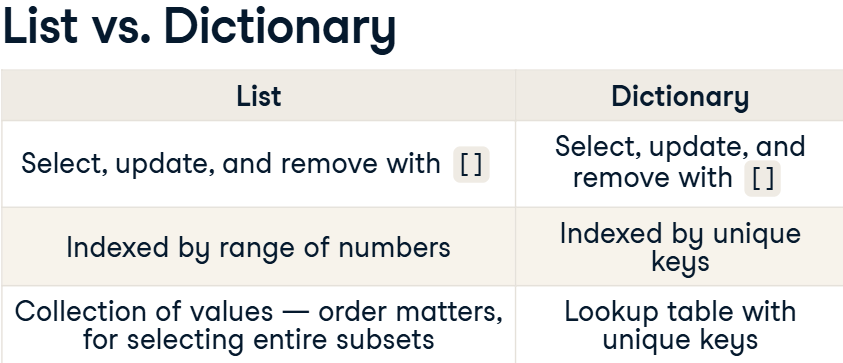

## Dealing with Dictionary

In [16]:
## Define a dictionary,前面是key，后面是value
Dict_sample = {1:"happy", 2:"sad", 3:"emotional", 4:"hate", 5:"fear"}

## Find all the keys of the dictionary，找出dictionary里的所有key
print(Dict_sample.keys())

## Find value of certain key,给一个key return它的value
print(Dict_sample[2])

##Add elements to the dictionary 添加元素/更改元素
Dict_sample[6] = "frustrated"
print(Dict_sample)

## 删除元素
del(Dict_sample[2])

## 检查一个元素是否在dict里面
print(2 in Dict_sample)
print(6 in Dict_sample)

## Dictionary里面包含dictionary的情况下
dic_in_dic = {1:{'happy':'positive'}, 2:{'sad':'negative'}, 3:{'hate':'negative'}}
print(dic_in_dic[1]['happy'])


dict_keys([1, 2, 3, 4, 5])
sad
{1: 'happy', 2: 'sad', 3: 'emotional', 4: 'hate', 5: 'fear', 6: 'frustrated'}
False
True
positive
